In [9]:
#프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

import seaborn as sns
import pandas as pd


#데이터 가져오기
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')

print(train.head())
print(train.info())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-n

In [10]:
#datetime 컬럼 6가지 컬럼 생성

train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

print(train.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

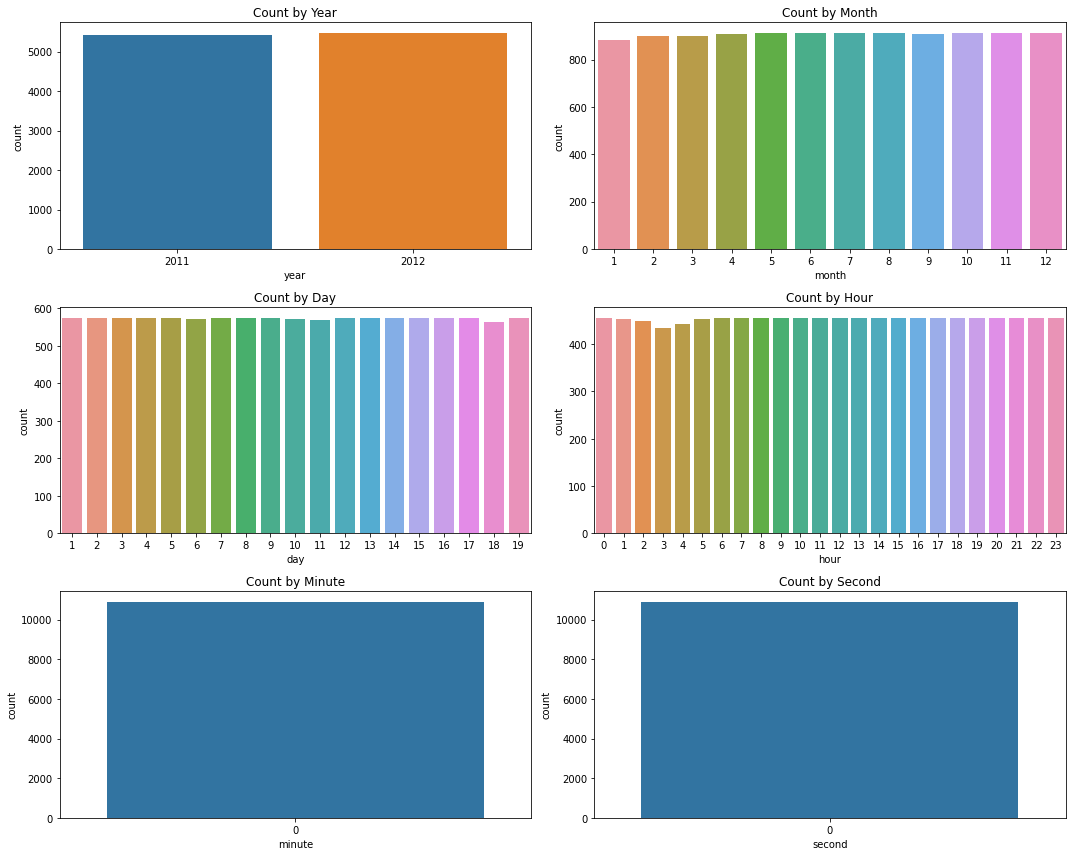

In [11]:
# 데이터 개수 시각화 하기
import matplotlib.pyplot as plt

# 시각화를 위한 subplot 설정
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 연도별
sns.countplot(x='year', data=train, ax=axes[0, 0])
axes[0, 0].set_title('Count by Year')

# 월별
sns.countplot(x='month', data=train, ax=axes[0, 1])
axes[0, 1].set_title('Count by Month')

# 일별
sns.countplot(x='day', data=train, ax=axes[1, 0])
axes[1, 0].set_title('Count by Day')

# 시간별
sns.countplot(x='hour', data=train, ax=axes[1, 1])
axes[1, 1].set_title('Count by Hour')

# 분별
sns.countplot(x='minute', data=train, ax=axes[2, 0])
axes[2, 0].set_title('Count by Minute')

# 초별
sns.countplot(x='second', data=train, ax=axes[2, 1])
axes[2, 1].set_title('Count by Second')

plt.tight_layout()
plt.show()

In [25]:
#train/test 데이터 분리, 최종시도
from sklearn.model_selection import train_test_split

# X(features)와 y(target) 데이터 정의
X = train[['season',  'holiday',  'workingday',  'weather',  'temp', 'humidity',  'windspeed',  'casual',  'registered', 'year',  'month',  'day',  'hour']]  # 선택적으로 features 추가/제거 가능
y = train['count']

# train/test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(8708, 13) (2178, 13)
(8708,) (2178,)


In [ ]:
#train/test 데이터 분리, 1차시도
#from sklearn.model_selection import train_test_split
#
# X(features)와 y(target) 데이터 정의
#X = train[['year', 'month', 'day', 'hour', 'temp', 'humidity', 'registered']]  # 선택적으로 features 추가/제거 가능
#y = train['count']
#
# train/test 데이터 분리
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
#print(X_train.shape, X_test.shape)
#print(y_train.shape, y_test.shape)

In [26]:
# LinearRegression 모델 학습하기
from sklearn.linear_model import LinearRegression

# LinearRegression 모델 불러오기 및 학습하기
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# 예측값 출력 및 손실함수값 계산
from sklearn.metrics import mean_squared_error
import numpy as np

# 예측값 출력
y_pred = model.predict(X_test)

# 손실함수 값 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MSE: 4.512249011777404e-26
RMSE: 2.124205501305701e-13


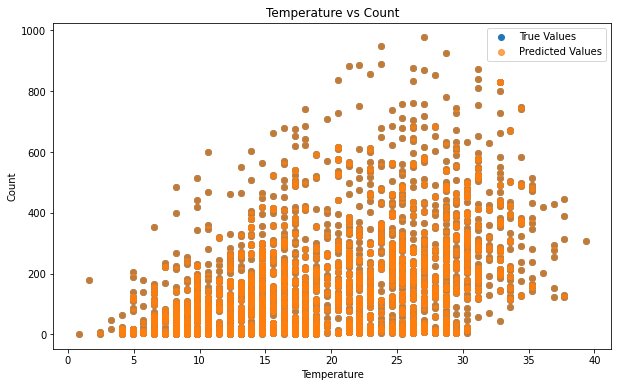

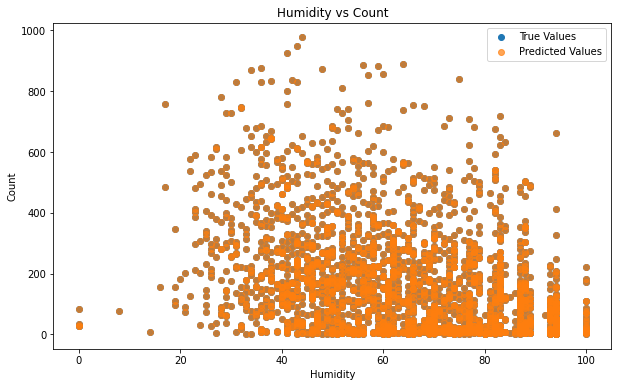

In [28]:
# temp와 count의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, label='True Values')
plt.scatter(X_test['temp'], y_pred, label='Predicted Values', alpha=0.7)
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.show()

# humidity와 count의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, label='True Values')
plt.scatter(X_test['humidity'], y_pred, label='Predicted Values', alpha=0.7)
plt.title('Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.show()
